# Ensemble Methods: Random Forest - A detailed overview

Rafiq Islam  
2024-10-07

## Introduction

Random Forest is one of the most popular machine learning algorithms,
known for its simplicity, versatility, and ability to perform both
classification and regression tasks. It operates by constructing a
multitude of decision trees during training and outputs the mode of the
classes (for classification) or the mean prediction (for regression) of
the individual trees.

## What is Random Forest?

Random Forest is an ensemble learning method that builds multiple
decision trees and combines their predictions to obtain a more accurate
and stable result. Each tree is built using a different random subset of
the data, and at each node, a random subset of features is considered
when splitting the data.

-   **Classification:** The final output is determined by majority
    voting from all the decision trees
-   **Regression:** The output is the average of all tree predictions.

## Mathematics Behind Random Forest

To understand Random Forest, we first need to recap how a decision tree
works and then explore how Random Forest extends this idea.

### <a href="../../posts/decisiontree/index.qmd" target="_blank"
style="text-decoration:none">Decision Tree Recap</a>

A decision tree is a tree-structured model where each internal node
represents a “test” on an attribute (e.g., whether the feature value is
above or below a threshold), each branch represents the outcome of the
test, and each leaf node represents a class label (classification) or a
value (regression).

-   For **classification**, the goal is to partition the data such that
    the class labels in each partition are as homogeneous as possible.  
-   For **regression**, the goal is to minimize the variance of the
    predicted values.

Mathematically, the decision tree makes decisions by minimizing the
**Gini Index** or **Entropy** for classification tasks and minimizing
the **Mean Squared Error (MSE)** for regression tasks.

### Random Forest Algorithm

Random Forest enhances decision trees by employing two key concepts:

-   **Random Sampling (Bootstrap Sampling):** From the training set of
    size $N$, randomly draw $N$ samples with replacement.  
-   **Feature Subsampling:** At each node of the decision tree, a random
    subset of the features is selected, and the best split is chosen
    only from these features.

The process for building a Random Forest can be summarized as follows:

1.  Draw $B$ bootstrap samples from the original dataset.
2.  For each bootstrap sample, grow an unpruned decision tree using a
    random subset of features at each node.
3.  For **classification**, combine the predictions of all the trees by
    majority voting.
4.  For **regression**, combine the predictions by averaging the outputs
    of all trees.

### Random Forest for Classification

For classification tasks, Random Forest works by constructing multiple
decision trees, each built on a different subset of the data and a
random subset of the features.

Given a dataset $D = \{(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)\}$, where
$x_i$ is a feature vector and $y_i$ is the class label, Random Forest
generates $B$ decision trees $T_1, T_2, ..., T_B$.

For each test point $x$, each tree $T_b$ gives a class prediction: $$
\hat{y}_b(x) = T_b(x)
$$ The final prediction is determined by majority voting: $$
\hat{y}(x) = \text{argmax}_k \sum_{b=1}^{B} I(\hat{y}_b(x) = k)
$$ where $I(\cdot)$ is an indicator function that equals 1 if the
condition is true and 0 otherwise.

------------------------------------------------------------------------

### Random Forest for Regression

In regression tasks, Random Forest builds trees that predict continuous
values and averages the results.

Given a dataset $D = \{(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)\}$, where
$x_i$ is a feature vector and $y_i$ is the continuous target variable,
Random Forest generates $B$ decision trees $T_1, T_2, ..., T_B$.

For each test point $x$, each tree $T_b$ gives a predicted value: $$
\hat{y}_b(x) = T_b(x)
$$ The final prediction is the average of all the tree predictions: $$
\hat{y}(x) = \frac{1}{B} \sum_{b=1}^{B} \hat{y}_b(x)
$$

------------------------------------------------------------------------

## Assumptions of Random Forest

Random Forest makes few assumptions about the data, making it highly
flexible. Some assumptions include:

-   **Independent Features:** While Random Forest does not explicitly
    assume that features are independent, correlated features can reduce
    its performance slightly.  
-   **Noisy Data:** Random Forest is robust to noise due to its ensemble
    nature.  
-   **Non-linearity:** Random Forest can handle non-linear relationships
    between features and the target.

## Advantages of Random Forest

-   **Reduction of Overfitting:** Random Forest reduces overfitting by
    averaging the predictions of multiple trees.
-   **Handles Missing Data:** It can handle missing values by assigning
    them to the most frequent class (classification) or mean value
    (regression).
-   **Robust to Noise:** It is relatively resistant to outliers and
    noise due to its ensemble nature.
-   **Works with Categorical & Continuous Variables:** Random Forest can
    handle both categorical and continuous data types.
-   **Feature Importance:** It provides an estimate of feature
    importance, allowing for better interpretability of models.

## Disadvantages of Random Forest

-   **Complexity:** The algorithm is computationally intensive,
    especially with a large number of trees.
-   **Interpretability:** While decision trees are interpretable, Random
    Forest is a “black-box” model where it’s hard to understand
    individual predictions.
-   **Memory Usage:** Random Forest can require more memory to store
    multiple decision trees.
-   **Bias in Imbalanced Data:** For classification tasks with
    imbalanced data, Random Forest may be biased toward the majority
    class.

------------------------------------------------------------------------

## Python Implementation

Here is a Python code example of how to implement Random Forest for both
classification and regression using `scikit-learn`.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import load_iris

# Classification Example: Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy}")

# Regression Example: Boston Housing dataset
df_raw = pd.read_csv("HousingData.csv")
df = df_raw.dropna()
X = df.drop(columns=['MEDV'])
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize RandomForest Regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Regression Mean Squared Error: {mse}")

Classification Accuracy: 1.0
Regression Mean Squared Error: 19.715794117647054

## Hyperparameter Tuning for Random Forest

Tuning the hyperparameters of a Random Forest can significantly improve
its performance. Here are some important hyperparameters to consider:

### Important Hyperparameters

-   **`n_estimators`:** This is the number of trees in the forest.
    Increasing this number usually improves performance but also
    increases computational cost.
    -   **Tip:** Start with a default value of 100 and increase as
        needed.  
-   **`max_depth`:** The maximum depth of each tree. Deeper trees can
    model more complex relationships, but they also increase the risk of
    overfitting.
    -   **Tip:** Use cross-validation to find the optimal depth that
        balances bias and variance  
-   **`min_samples_split`:** The minimum number of samples required to
    split an internal node. Higher values prevent the tree from becoming
    too specific (overfitting).
    -   **Tip:** Use higher values (e.g., 5 or 10) to reduce overfitting
        in noisy datasets.
-   **`min_samples_leaf`:** The minimum number of samples required to be
    at a leaf node. Larger leaf sizes reduce model complexity and can
    help generalization.
-   **`max_features`:** The number of features to consider when looking
    for the best split. Randomly selecting fewer features can reduce
    correlation between trees and improve generalization.
    -   **Tip:** For classification, a common choice is
        `sqrt(number_of_features)`. For regression,
        `max_features = number_of_features / 3` is often effective.
-   **`bootstrap`:** Whether to use bootstrap samples when building
    trees. Set this to `True` for Random Forest (default) or `False` for
    extremely randomized trees (also known as ExtraTrees).

### Grid Search for Hyperparameter Tuning

To fine-tune the hyperparameters of a Random Forest, we can use
**GridSearchCV** or **RandomizedSearchCV** in `scikit-learn`. Here’s an
example of how to use `GridSearchCV` for tuning a Random Forest
Classifier:

In [2]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Parameters: {accuracy}")

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy with Best Parameters: 1.0

Using this technique, we can find the combination of hyperparameters
that yields the best model performance.

## Feature Importance in Random Forest

One of the appealing aspects of Random Forest is that it provides a
measure of **feature importance**, which indicates how much each feature
contributes to the model’s predictions.

### Computing Feature Importance

In Random Forest, feature importance is computed by measuring the
**average reduction in impurity** (e.g., Gini impurity or MSE) brought
by each feature across all trees. Features that lead to larger
reductions are considered more important.

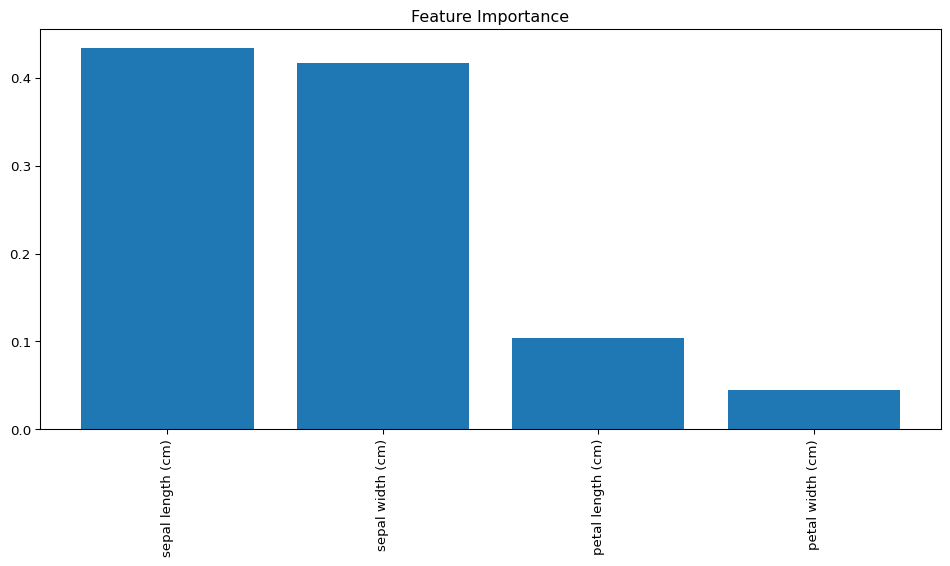

In [3]:
import matplotlib.pyplot as plt
import numpy as np

clf.fit(X_train,y_train)
# Get feature importance from the RandomForest model
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), iris.feature_names, rotation=90)
plt.tight_layout()
plt.show()

The bar chart is showing the relative importance of each feature, making
it easier to understand which features have the most predictive power.

## Out-of-Bag (OOB) Error Estimate

Random Forest uses **Out-of-Bag (OOB)** samples as an alternative to
cross-validation. Since each tree is trained on a bootstrap sample,
about one-third of the data is left out in each iteration. These
“out-of-bag” samples can be used to estimate the model’s performance
without the need for a separate validation set.

### Enabling OOB in Python

You can enable the out-of-bag error estimate by setting `oob_score=True`
in the `RandomForestClassifier` or `RandomForestRegressor`.

In [4]:
clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
clf.fit(X_train, y_train)

# Access the OOB score
print(f"OOB Score: {clf.oob_score_}")

OOB Score: 0.9428571428571428

The OOB score is an unbiased estimate of the model’s performance, which
is particularly useful when the dataset is small and splitting it
further into training/validation sets might reduce training
effectiveness.

## Dealing with Imbalanced Data

For imbalanced classification tasks (where one class is much more
frequent than the others), Random Forest may be biased toward predicting
the majority class. Several techniques can help mitigate this issue:

-   **Class Weights:** You can assign higher weights to the minority
    class to force the model to pay more attention to it.

In [5]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

-   **Resampling:** You can either oversample the minority class or
    undersample the majority class.

In [6]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

## Random Forest in Practice: Best Practices

-   **Cross-Validation:** Always perform cross-validation to ensure the
    model generalizes well
-   **Parallelization:** Random Forest naturally supports
    parallelization. If using `scikit-learn`, set `n_jobs=-1` to utilize
    all CPU cores for training.  
-   **Ensemble Methods:** For better results, you can combine Random
    Forest with other ensemble methods, such as boosting (e.g., XGBoost
    or Gradient Boosting) to further improve performance.

Random Forest is a highly flexible, non-parametric machine learning
algorithm that can be used for both classification and regression tasks.
Its ensemble-based approach reduces overfitting, improves predictive
performance, and provides valuable insights like feature importance.
Despite its many advantages, Random Forest is computationally intensive
and may not be the best choice for real-time applications or datasets
with extremely high dimensionality.

------------------------------------------------------------------------

## References

1.  Breiman, L. (2001). “Random Forests”. Machine Learning, 45(1), 5-32.
2.  Pedregosa, F., et al. (2011). “Scikit-learn: Machine Learning in
    Python”. Journal of Machine Learning Research, 12, 2825-2830.
3.  Hastie, T., Tibshirani, R., & Friedman, J. (2009). “The Elements of
    Statistical Learning”. Springer Series in Statistics.

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/posts/randomforest/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/posts/randomforest/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/posts/randomforest/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**